In [1]:
from marubatsu import Marubatsu, Marubatsu_GUI
import math

def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            self.draw_board()
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            num = int(event.key) - 1
            x = num % 3
            y = 2 - (num // 3)
            print(x, y)
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

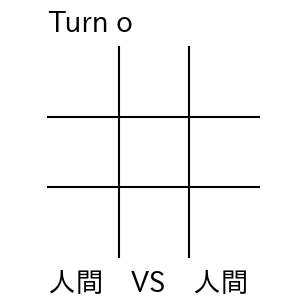

0 2
1 2
2 2
0 1
1 1
2 1
0 0
1 0
2 0


ValueError: invalid literal for int() with base 10: 'a'

In [2]:
from util import gui_play

gui_play()

In [3]:
def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            self.draw_board()
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                x = num % 3
                y = 2 - (num // 3)
                print(x, y)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

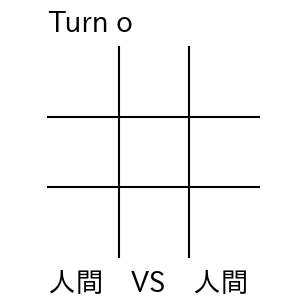

In [4]:
gui_play()

In [5]:
def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            self.draw_board()
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                event.inaxes = True
                event.xdata = num % 3
                event.ydata = 2 - (num // 3)
                on_mouse_down(event)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

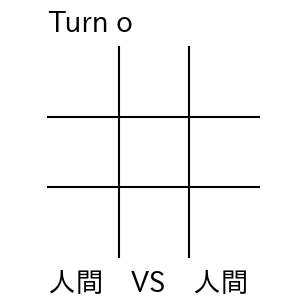

In [6]:
gui_play()

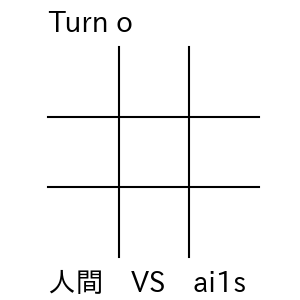

In [7]:
from ai import ai1s

gui_play(ai=[None, ai1s])

In [8]:
def draw_board(self):
    print("draw_board. move_count =", self.mb.move_count)
    
    ax = self.ax
    ai = self.mb.ai
    
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # リプレイ中、ゲームの決着がついていた場合は背景色を変更する
    is_replay =  self.mb.move_count < len(self.mb.records) - 1 
    if self.mb.status == Marubatsu.PLAYING:
        facecolor = "lightcyan" if is_replay else "white"
    else:
        facecolor = "lightyellow"

    ax.figure.set_facecolor(facecolor)
        
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.mb.status == Marubatsu.PLAYING:
        text = "Turn " + self.mb.turn
    # 引き分けの場合
    elif self.mb.status == Marubatsu.DRAW:
        text = "Draw game"
    # 決着がついていれば勝者を表示する
    else:
        text = "Winner " + self.mb.status
    # リプレイ中の場合は "Replay" を表示する
    if is_replay:
        text += " Replay"
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.mb.BOARD_SIZE):
        ax.plot([0, self.mb.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.mb.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.mb.BOARD_SIZE):
        for x in range(self.mb.BOARD_SIZE):
            color = "red" if (x, y) == self.mb.last_move else "black"
            self.draw_mark(ax, x, y, self.mb.board[x][y], color)            

    self.update_widgets_status()   
    
Marubatsu_GUI.draw_board = draw_board

draw_board. move_count = 0


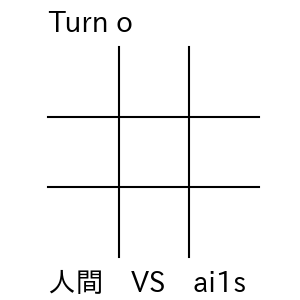

draw_board. move_count = 1
draw_board. move_count = 1
draw_board. move_count = 1
draw_board. move_count = 2


In [9]:
gui_play(ai=[None, ai1s])

In [10]:
import inspect

def a():
    b()

def b():
    c()
    
def c():
    stack = inspect.stack()
    print(stack[0].function) # この関数の名前
    print(stack[1].function) # この関数を 1 つ前に呼び出した関数の名前
    print(stack[2].function) # この関数を 2 つ前に呼び出した関数の名前
    print(stack[3].function) # この関数を 3 つ前に呼び出した関数の名前
    
a()

c
b
a
<module>


In [11]:
import inspect

def draw_board(self):
    print("draw_board. move_count =", self.mb.move_count, 
          "caller function =", inspect.stack()[1].function)
    
    ax = self.ax
    ai = self.mb.ai
    
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # リプレイ中、ゲームの決着がついていた場合は背景色を変更する
    is_replay =  self.mb.move_count < len(self.mb.records) - 1 
    if self.mb.status == Marubatsu.PLAYING:
        facecolor = "lightcyan" if is_replay else "white"
    else:
        facecolor = "lightyellow"

    ax.figure.set_facecolor(facecolor)
        
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.mb.status == Marubatsu.PLAYING:
        text = "Turn " + self.mb.turn
    # 引き分けの場合
    elif self.mb.status == Marubatsu.DRAW:
        text = "Draw game"
    # 決着がついていれば勝者を表示する
    else:
        text = "Winner " + self.mb.status
    # リプレイ中の場合は "Replay" を表示する
    if is_replay:
        text += " Replay"
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.mb.BOARD_SIZE):
        ax.plot([0, self.mb.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.mb.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.mb.BOARD_SIZE):
        for x in range(self.mb.BOARD_SIZE):
            color = "red" if (x, y) == self.mb.last_move else "black"
            self.draw_mark(ax, x, y, self.mb.board[x][y], color)            

    self.update_widgets_status()   
    
Marubatsu_GUI.draw_board = draw_board

draw_board. move_count = 0 caller function = play_loop


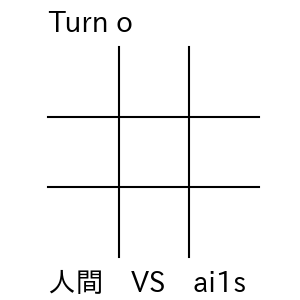

draw_board. move_count = 1 caller function = on_mouse_down
draw_board. move_count = 1 caller function = play_loop
draw_board. move_count = 1 caller function = change_step
draw_board. move_count = 2 caller function = play_loop
draw_board. move_count = 3 caller function = on_mouse_down
draw_board. move_count = 2 caller function = change_step
draw_board. move_count = 2 caller function = play_loop


In [12]:
gui_play(ai=[None, ai1s])

In [13]:
def update_widgets_status(self):
    self.set_button_status(self.undo_button, self.mb.move_count < 2 or self.mb.move_count != len(self.mb.records) - 1)
    self.set_button_status(self.first_button, self.mb.move_count <= 0)
    self.set_button_status(self.prev_button, self.mb.move_count <= 0)
    self.set_button_status(self.next_button, self.mb.move_count >= len(self.mb.records) - 1)
    self.set_button_status(self.last_button, self.mb.move_count >= len(self.mb.records) - 1)    
    print(f"before: value = {self.slider.value} max = {self.slider.max}")
    self.slider.value = self.mb.move_count
    self.slider.max = len(self.mb.records) - 1
    print(f"after:  value = {self.slider.value} max = {self.slider.max}")

Marubatsu_GUI.update_widgets_status = update_widgets_status

draw_board. move_count = 0 caller function = play_loop
before: value = 0 max = 100
after:  value = 0 max = 0


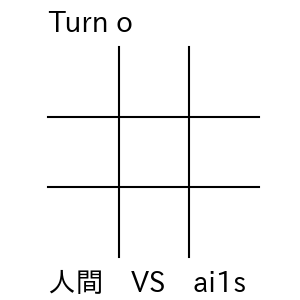

draw_board. move_count = 1 caller function = on_mouse_down
before: value = 0 max = 0
after:  value = 0 max = 1
draw_board. move_count = 1 caller function = play_loop
before: value = 0 max = 1
draw_board. move_count = 1 caller function = change_step
before: value = 1 max = 1
after:  value = 1 max = 1
after:  value = 1 max = 1
draw_board. move_count = 2 caller function = play_loop
before: value = 1 max = 1
after:  value = 1 max = 2


In [14]:
gui_play(ai=[None, ai1s])

In [15]:
import ipywidgets as widgets

slider = widgets.IntSlider(max=10)
slider.value = 20
print(slider.value)


10


In [16]:
def update_widgets_status(self):
    self.set_button_status(self.undo_button, self.mb.move_count < 2 or self.mb.move_count != len(self.mb.records) - 1)
    self.set_button_status(self.first_button, self.mb.move_count <= 0)
    self.set_button_status(self.prev_button, self.mb.move_count <= 0)
    self.set_button_status(self.next_button, self.mb.move_count >= len(self.mb.records) - 1)
    self.set_button_status(self.last_button, self.mb.move_count >= len(self.mb.records) - 1)    
    print(f"before: value = {self.slider.value} max = {self.slider.max}")
    self.slider.max = len(self.mb.records) - 1
    self.slider.value = self.mb.move_count
    print(f"after:  value = {self.slider.value} max = {self.slider.max}")

Marubatsu_GUI.update_widgets_status = update_widgets_status

draw_board. move_count = 0 caller function = play_loop
before: value = 0 max = 100
after:  value = 0 max = 0


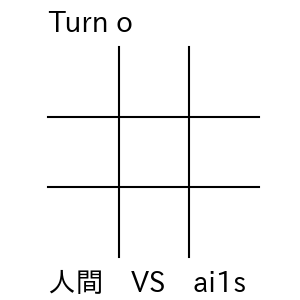

draw_board. move_count = 1 caller function = on_mouse_down
before: value = 0 max = 0
draw_board. move_count = 1 caller function = change_step
before: value = 1 max = 1
after:  value = 1 max = 1
after:  value = 1 max = 1
draw_board. move_count = 1 caller function = play_loop
before: value = 1 max = 1
after:  value = 1 max = 1
draw_board. move_count = 2 caller function = play_loop
before: value = 1 max = 1
draw_board. move_count = 2 caller function = change_step
before: value = 2 max = 2
after:  value = 2 max = 2
after:  value = 2 max = 2
draw_board. move_count = 3 caller function = on_mouse_down
before: value = 2 max = 2
draw_board. move_count = 3 caller function = change_step
before: value = 3 max = 3
after:  value = 3 max = 3
after:  value = 3 max = 3
draw_board. move_count = 3 caller function = play_loop
before: value = 3 max = 3
after:  value = 3 max = 3
draw_board. move_count = 4 caller function = play_loop
before: value = 3 max = 3
draw_board. move_count = 4 caller function = chan

In [18]:
gui_play(ai=[None, ai1s])

In [19]:
def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    # step 手目の局面に移動する
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        if self.mb.move_count != changed["new"]:
            change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    # ゲーム盤を選択した状態でキーを押した場合のイベントハンドラ
    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
        else:
            try:
                num = int(event.key) - 1
                event.inaxes = True
                event.xdata = num % 3
                event.ydata = 2 - (num // 3)
                on_mouse_down(event)
            except:
                pass
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

draw_board. move_count = 0 caller function = play_loop
before: value = 0 max = 100
after:  value = 0 max = 0


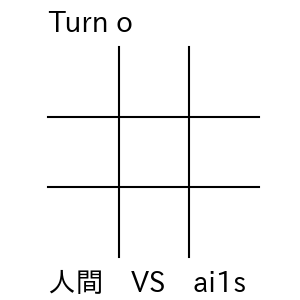

draw_board. move_count = 1 caller function = play_loop
before: value = 0 max = 0
after:  value = 1 max = 1
draw_board. move_count = 2 caller function = play_loop
before: value = 1 max = 1
after:  value = 2 max = 2


In [20]:
gui_play(ai=[None, ai1s])